In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

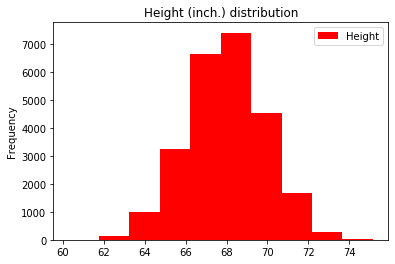

In [4]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution');

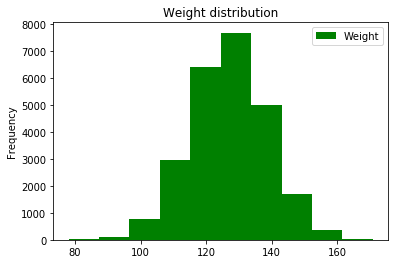

In [5]:
data.plot(y = 'Weight', kind = 'hist',
          color = 'green', title = 'Weight distribution');

## Индекс массы тела


In [6]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [7]:
data['BMI'] = data.apply(lambda row : make_bmi(row['Height'], row['Weight']), axis = 1)

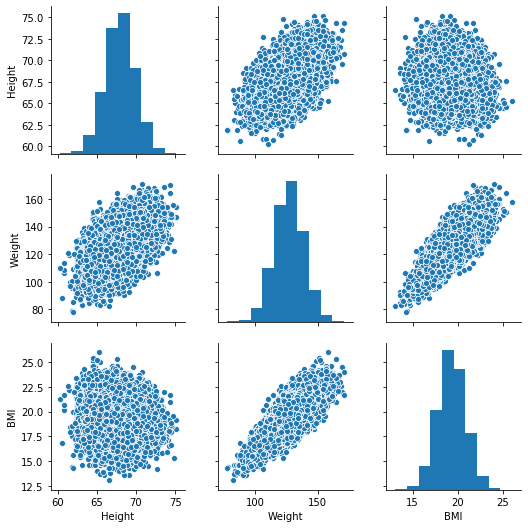

In [8]:
sns.pairplot(data);

## Весовая катигория


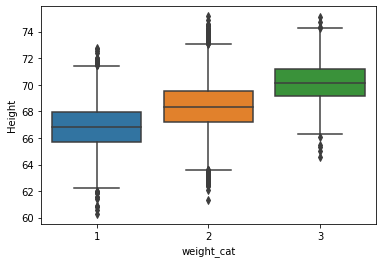

In [9]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight < 150:
        return 2
    else: return 3

data['weight_cat'] = data['Weight'].apply(weight_category)

sns.boxplot(x = data['weight_cat'], y = data['Height']);

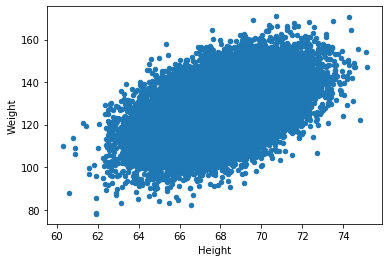

In [16]:
data.plot(x = 'Height', y = 'Weight', kind = 'scatter');

## Минимизация квадратичной ошибки

In [86]:
def sq_error(W, X = data['Weight'], Y = data['Height']):
    res = 0
    for x, y in zip(X, Y):
        res += (y - (W[0] + W[1]*x))**2
    return res

In [87]:
test_w0 = 50
test_w1 = np.arange(-1, 1, 0.1)
test_errors = np.array([])
for t_w1 in test_w1:
    test_errors = np.append(test_errors, sq_error([test_w0, t_w1]))

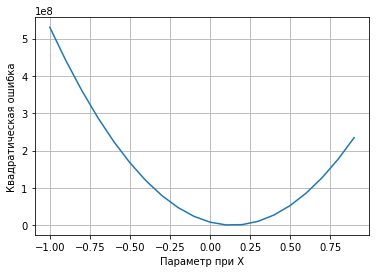

In [88]:
fig, ax = plt.subplots()
ax.plot(test_w1, test_errors)
ax.grid()
ax.set_xlabel('Параметр при Х')
ax.set_ylabel('Квадратическая ошибка')
plt.show()

In [89]:
from mpl_toolkits.mplot3d import Axes3D

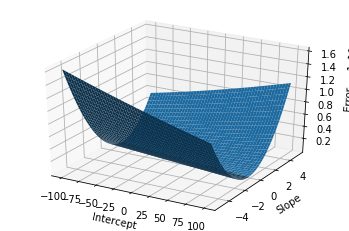

In [92]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
W0 = np.linspace(-100, 100, num = 200)
W1 = np.linspace(-5, 5, num = 200)
X, Y = np.meshgrid(W0, W1)
Z = sq_error([X, Y])

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [94]:
import scipy
w = [0, 0]
scipy.optimize.minimize(sq_error, w)

      fun: 67545.2870853115
 hess_inv: array([[ 9.94487957e-04, -7.63757832e-06],
       [-7.63757832e-06,  5.98593703e-08]])
      jac: array([0.00292969, 0.05957031])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 185
      nit: 6
     njev: 44
   status: 2
  success: False
        x: array([57.57171928,  0.08200693])

## Результат

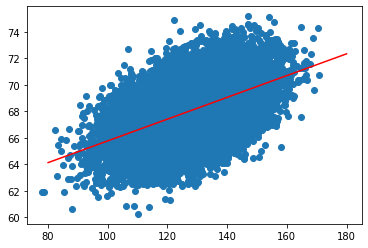

In [113]:
fig, ax = plt.subplots()
weight1 = 80
height1 = 57.57171928 + 0.08200693*weight1

weight2 = 180
height2 = 57.57171928 + 0.08200693*weight2
ax.scatter(data['Weight'], data['Height']);
ax.plot([weight1, weight2], [height1, height2] , color = 'red')
plt.show()